In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('winequality-white.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


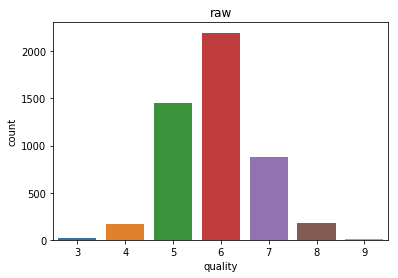

In [3]:
#For this first round, we attempt to do balancing

plt.figure()

sns.countplot('quality', data=df)

plt.title('raw')

plt.show()

In [4]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
#From graph, qualities 3 and 9 are too small. Therefore we do a mapping to convert them for dropping

dict_quality= {
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8
}

df['quality'] = df['quality'].map(dict_quality)

#drop NaN columns
df = df.dropna()

df.quality.value_counts()

6.0    2198
5.0    1457
7.0     880
8.0     175
4.0     163
Name: quality, dtype: int64

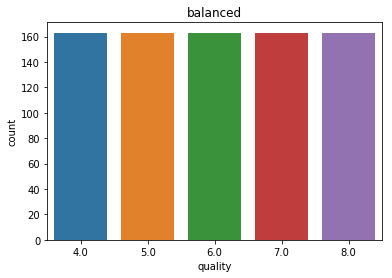

In [6]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
q4_df = shuffled_df.loc[shuffled_df['quality'] == 4]

#Randomly select ? observations from the majority classes
q5_df = shuffled_df.loc[shuffled_df['quality'] == 5].sample(n = 163,random_state=42)

q6_df = shuffled_df.loc[shuffled_df['quality'] == 6].sample(n = 163,random_state=42)

q7_df = shuffled_df.loc[shuffled_df['quality'] == 7].sample(n = 163,random_state=42)

q8_df = shuffled_df.loc[shuffled_df['quality'] == 8].sample(n = 163,random_state=42)


# Concatenate both dataframes again
normalized_df = pd.concat([q4_df, q5_df, q6_df, q7_df, q8_df])

plt.figure()

sns.countplot('quality', data=normalized_df)

plt.title('balanced')

plt.show()

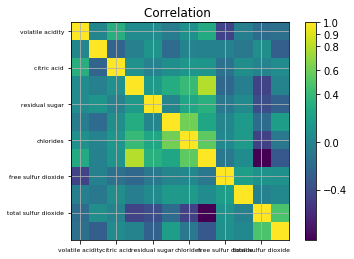

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [8]:
normalized_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.016584,0.329899,0.056514,0.060271,-0.050574,0.089945,0.290890,-0.452254,-0.034397,-0.178733,-0.149701
volatile acidity,0.016584,1.000000,-0.224522,-0.030362,0.120079,-0.187926,-0.008338,-0.017716,-0.020118,-0.091873,0.075972,-0.270637
citric acid,0.329899,-0.224522,1.000000,0.098169,-0.013620,0.085717,0.132832,0.123602,-0.142096,0.080407,-0.007040,0.055588
residual sugar,0.056514,-0.030362,0.098169,1.000000,0.165737,0.307634,0.410608,0.800518,-0.202572,-0.044165,-0.447238,-0.007361
chlorides,0.060271,0.120079,-0.013620,0.165737,1.000000,0.006899,0.249668,0.336599,-0.095332,0.049257,-0.387237,-0.252224
free sulfur dioxide,-0.050574,-0.187926,0.085717,0.307634,0.006899,1.000000,0.609156,0.253535,0.009701,0.159906,-0.174681,0.193370
total sulfur dioxide,0.089945,-0.008338,0.132832,0.410608,0.249668,0.609156,1.000000,0.547447,0.029441,0.157182,-0.467077,-0.091645
density,0.290890,-0.017716,0.123602,0.800518,0.336599,0.253535,0.547447,1.000000,-0.094401,0.065005,-0.821279,-0.320873
pH,-0.452254,-0.020118,-0.142096,-0.202572,-0.095332,0.009701,0.029441,-0.094401,1.000000,0.198060,0.109663,0.093974
sulphates,-0.034397,-0.091873,0.080407,-0.044165,0.049257,0.159906,0.157182,0.065005,0.198060,1.000000,-0.021512,0.028819


In [182]:
print(type(normalized_df))
normalized_df

<class 'pandas.core.frame.DataFrame'>


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
993,7.0,0.240,0.18,1.30,0.046,9.0,62.0,0.99400,3.38,0.47,10.1,4.0
3218,6.5,0.290,0.25,2.50,0.142,8.0,111.0,0.99270,3.00,0.44,9.9,4.0
1042,7.3,0.490,0.32,5.20,0.043,18.0,104.0,0.99520,3.24,0.45,10.7,4.0
2318,7.5,0.260,0.59,11.80,0.046,58.0,164.0,0.99814,3.17,0.46,8.9,4.0
1420,9.2,0.280,0.49,11.80,0.042,29.0,137.0,0.99800,3.10,0.34,10.1,4.0
204,5.8,0.280,0.35,2.30,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,4.0
1294,6.9,0.410,0.22,4.20,0.031,10.0,102.0,0.99300,3.00,0.86,11.6,4.0
2412,6.3,0.380,0.17,8.80,0.080,50.0,212.0,0.99803,3.47,0.66,9.4,4.0
1040,8.2,0.680,0.30,2.10,0.047,17.0,138.0,0.99500,3.22,0.71,10.8,4.0
4804,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,4.0


[Text(0, 0.5, 'density'), Text(0.5, 0, 'alcohol')]

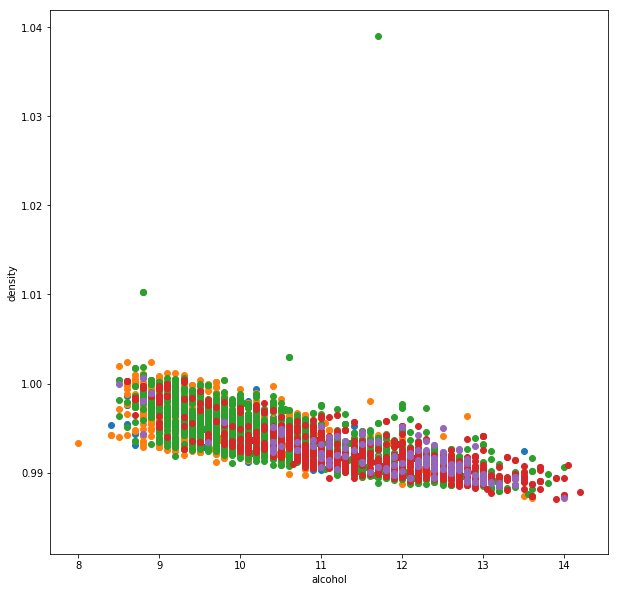

In [200]:
# we can plot the two classes (alcohol and density)

df_four = df.loc[df['quality'] == 4]
df_five = df.loc[df['quality'] == 5]
df_six = df.loc[df['quality'] == 6]
df_seven = df.loc[df['quality'] == 7]
df_eight = df.loc[df['quality'] == 8]
fix, ax = plt.subplots(figsize=(10,10))
# we are going to use 'Detergents_Paper' and 'Milk' as
ax.scatter(df_four['alcohol'], df_four['density'])
ax.scatter(df_five['alcohol'], df_five['density'])
ax.scatter(df_six['alcohol'], df_six['density'])
ax.scatter(df_seven['alcohol'], df_seven['density'])
ax.scatter(df_eight['alcohol'], df_eight['density'])
ax.set(xlabel = 'alcohol', ylabel = 'density')

# K-Means Clustering 

In [190]:
#we chose features "volatile acidity, chlorides,density and alcohol"

print(normalized_df.iloc[:,0:11])

x = normalized_df.iloc[:,0:11].values
print(type(x))
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
993             7.0             0.240         0.18            1.30      0.046   
3218            6.5             0.290         0.25            2.50      0.142   
1042            7.3             0.490         0.32            5.20      0.043   
2318            7.5             0.260         0.59           11.80      0.046   
1420            9.2             0.280         0.49           11.80      0.042   
204             5.8             0.280         0.35            2.30      0.053   
1294            6.9             0.410         0.22            4.20      0.031   
2412            6.3             0.380         0.17            8.80      0.080   
1040            8.2             0.680         0.30            2.10      0.047   
4804            6.0             0.350         0.46            0.90      0.033   
702             6.6             0.380         0.18            1.20      0.042   
2379            6.4         

[1726126.2326516334, 676339.0324060415, 430500.0139231861, 328651.01808911917, 279151.50238682603, 242600.0838373642, 212037.12394748474, 189728.1339136731, 172800.075653825, 156932.64057369952]


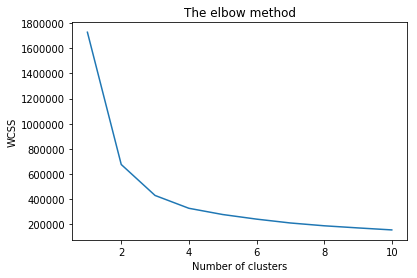

In [191]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Seems like the optimal cluster is 3 (the slope starts to flatten), which means the could be 3 different pattern / clusters from the dataset

In [192]:
#train the data 

km2 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x)

y_kmeans = km2.fit_predict(x)

In [193]:
type(y_kmeans)
y_kmeans.shape

(815,)

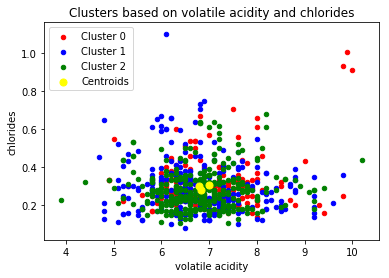

In [195]:
from sklearn.preprocessing import StandardScaler
# x_scaled = StandardScaler().fit_transform(x)

# km2_scaled = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# km2_scaled.fit(x_scaled)
# y_kmeans = km2_scaled.fit_predict(x_scaled)

# #Visualising the clusters by selecting only column 1 and 10 (volatile acidity and chlorides)
# #based on scaled data
# plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
# plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#based on normal data
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
#how to get the centroid : using cluster_centers_
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.title('Clusters based on volatile acidity and chlorides')
plt.xlabel(normalized_df.columns[1])
plt.ylabel(normalized_df.columns[4])

plt.legend()
plt.show()

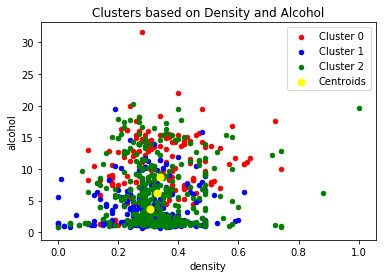

In [196]:
#Visualising the clusters by selecting only column 2 and 3 (density and alcohol)
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
#how to get the centroid : using cluster_centers_
plt.scatter(km2.cluster_centers_[:, 2], km2.cluster_centers_[:,3], s = 50, c = 'yellow', label = 'Centroids')

plt.title('Clusters based on Density and Alcohol')
plt.xlabel(normalized_df.columns[7])
plt.ylabel(normalized_df.columns[10])

plt.legend()
plt.show()

This clustering although looks good, it is highly influenced by one of the features(alcohol) instead of both features 

# With Scaling 

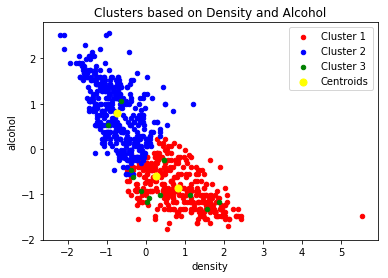

In [99]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

km2_scaled = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2_scaled.fit(x_scaled)
y_kmeans = km2_scaled.fit_predict(x_scaled)

#Visualising the clusters by selecting only column 2 and 3 (density and alcohol)
plt.scatter(x_scaled[y_kmeans == 0, 2], x_scaled[y_kmeans == 0, 3], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 2], x_scaled[y_kmeans == 1, 3], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 2], x_scaled[y_kmeans == 2, 3], s = 20, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
#how to get the centroid : using cluster_centers_
plt.scatter(km2_scaled.cluster_centers_[:, 2], km2_scaled.cluster_centers_[:,3], s = 50, c = 'yellow', label = 'Centroids')

plt.title('Clusters based on Density and Alcohol')
plt.xlabel(normalized_df.columns[7])
plt.ylabel(normalized_df.columns[10])

plt.legend()
plt.show()

# DBSCAN

[ 9.68403977e-02 -3.37455481e-01  4.97728901e-01  1.47990573e+00
  1.43313541e+00 -4.37677607e-01 -2.37233355e-01  1.44315762e+00
  4.30914151e-01 -1.45994329e+00 -3.37455481e-01  4.84365951e-01
 -8.18521685e-01  1.56008344e+00 -1.10285329e-01  1.55340196e+00
  3.00256471e-02  1.33291328e+00 -1.17263986e+00  1.63655148e-01
 -5.71307108e-01  3.00256471e-02 -2.37233355e-01 -9.65514136e-01
  4.37595626e-01 -1.43692704e-01 -3.38172817e-03  1.56676491e+00
 -7.88455047e-01  1.64694261e+00  9.68403977e-02 -5.54603420e-01
 -8.21862423e-01 -4.57722032e-01 -1.97144505e-01 -9.72195612e-01
  6.31358402e-01 -1.17263986e+00 -7.01964787e-02 -3.67891035e-02
 -2.23870405e-01 -1.33967674e+00  6.98173153e-01  3.64099400e-01
  2.30469899e-01 -3.44136956e-01  2.97284649e-01  1.39972803e+00
  2.23491242e+00  4.77684476e-01  3.30692025e-01  4.64321526e-01
  1.16587641e+00  1.39972803e+00 -9.25425286e-01  8.31802654e-01
  1.29950591e+00  1.63357966e+00  6.17995452e-01  8.65210029e-01
  1.29950591e+00  9.68403

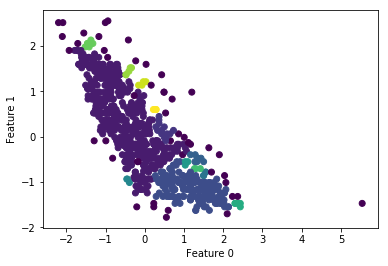

In [124]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Separating out the features
features = ['density','alcohol']
x_dbscan = normalized_df.loc[:, features].values
#Separating out the target
y_pca = normalized_df.loc[:,['quality']].values
#standardizing the features
x_std = StandardScaler().fit_transform(x_dbscan)


# cluster the data
dbscan = DBSCAN(eps=0.123, min_samples = 3)
clusters = dbscan.fit_predict(x_std)

# plot the cluster assignments
print(x_std[:,0])
print(x_std[:,1])
plt.scatter(x_std[:, 0], x_std[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

In [125]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 13
Number of noise sample = 47
